# Unpaired Image translation- UPIT package
(Made available to public use by Abraham)

1. https://github.com/tmabraham/upit.git 

### Authors : Gopalika Sharma and Surya Menon

Install
To install, use pip:

pip install git+https://github.com/tmabraham/UPIT.git


In [3]:
#uploading the git file to the notebook and pulling it's contents
!pip install git+https://github.com/tmabraham/upit.git >/dev/null

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


## Imports

In [4]:
from upit.data.unpaired import *
from upit.models.cyclegan import *
from upit.train.cyclegan import *
from upit.inference.cyclegan import *
from fastai.vision.all import *


### This is a package for training and testing unpaired image-to-image translation models. It currently only includes the CycleGAN model, but other models will be implemented in the future.This package uses fastai to accelerate deep learning experimentation. Additionally, nbdev was used to develop the package and produce documentation based on a series of notebooks.

### The package uses torch 1.6.0, torchvision 0.7.0, and fastai 2.0.0 (and its dependencies). It also requires nbdev 0.2.26 if you would like to add features to the package. Finally, for creating a web app model interface, gradio 1.1.6 is used.

### Training a CycleGAN model is easy with UPIT! Given the paths of the images from the two domains trainA_path and trainB_path and then just run the following cells. (1)


## Load data

In [5]:
trainA_path = Path('../input/gan-getting-started/photo_jpg')
trainB_path = Path('../input/gan-getting-started/monet_jpg')
print(f"There are {len(trainA_path.ls())} photos")
print(f"There are {len(trainB_path.ls())} Monet paintings")

There are 7038 photos
There are 300 Monet paintings


In [6]:
dls = get_dls(trainA_path, trainB_path,load_size=256,crop_size=256)

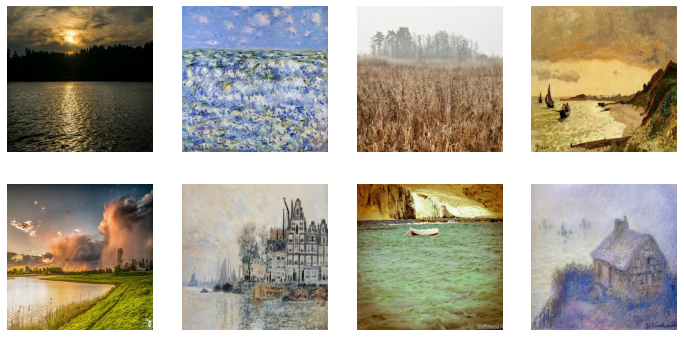

In [7]:
dls.show_batch()

In [8]:
# can increase the generator blocks to 4,6
cycle_gan = CycleGAN(3,3,64,gen_blocks=3)

In [9]:
#modify optimiser to GradientOptimizer instead of Adam
learn = cycle_learner(dls, cycle_gan,opt_func=partial(Adam,mom=0.5,sqr_mom=0.999),show_img_interval=8)

/opt/conda/lib/python3.7/site-packages/fastai/learner.py:53: UserWarning: Could not load the optimizer state.
  if with_opt: warn("Could not load the optimizer state.")


SuggestedLRs(lr_min=4.786300996784121e-05, lr_steep=5.248074739938602e-05)

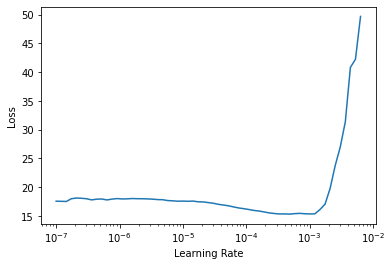

In [10]:
learn.lr_find()

### Changes made are epoch size, generative size and batch size as the package itself makes the 2 generators and discriminator, also using different optimizers like Gradient descent instead of ADAM

epoch,train_loss,id_loss_A,id_loss_B,gen_loss_A,gen_loss_B,cyc_loss_A,cyc_loss_B,D_A_loss,D_B_loss,time
0,6.036859,0.944901,0.933994,0.392484,0.397174,2.055280,1.966968,0.208239,0.208239,20:46
1,5.175046,0.764919,0.717911,0.488991,0.410985,1.661762,1.545462,0.175775,0.175775,20:44
2,5.537946,0.670655,0.626783,0.450791,0.500173,1.485068,1.314480,0.209226,0.209226,20:43
3,4.898970,0.624254,0.541184,0.475569,0.550998,1.359254,1.159396,0.210969,0.210969,20:42
4,5.074733,0.621086,0.545430,0.647187,0.701043,1.354843,1.165857,0.124592,0.124592,20:42
5,4.130414,0.557525,0.473982,0.399301,0.482991,1.249194,1.005963,0.277644,0.277644,20:42
6,4.636983,0.546750,0.483888,0.435274,0.697185,1.248752,0.996026,0.202421,0.202421,20:43
7,4.665183,0.568413,0.463485,0.661389,0.677292,1.245642,1.022187,0.115889,0.115889,20:44
8,4.161801,0.530455,0.446805,0.503483,0.750897,1.193310,0.942633,0.211860,0.211860,20:44
9,4.369839,0.503256,0.418860,0.488955,0.775996,1.133229,0.875680,0.161097,0.161097,20:44


/opt/conda/lib/python3.7/site-packages/fastprogress/fastprogress.py:74: UserWarning: Your generator is empty.
  warn("Your generator is empty.")


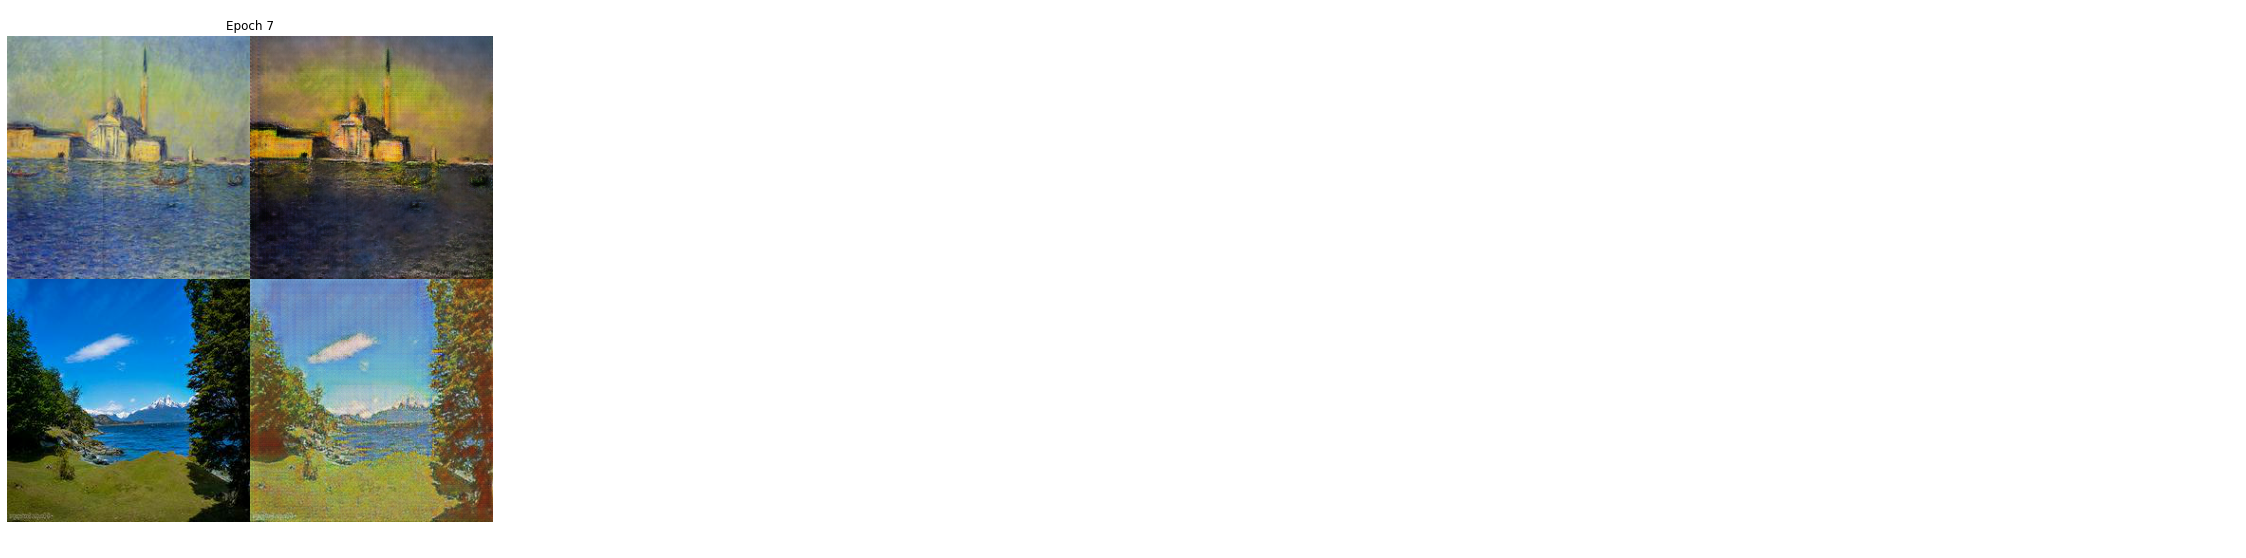

In [11]:
#decided to run for 14 epochs becuase of the size of dataset, can increase or descrease the epochs value
learn.fit_flat_lin(7,7,2e-4)

In [12]:
b = dls.one_batch()
_,_,preds = learn.get_preds(dl=[b], with_decoded=True)

Text(0.5, 0.98, 'Predictions')

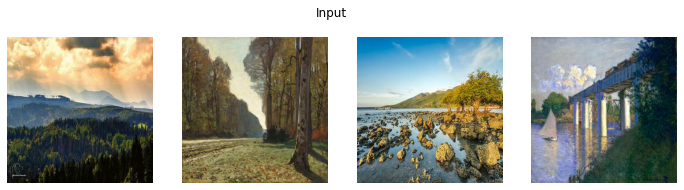

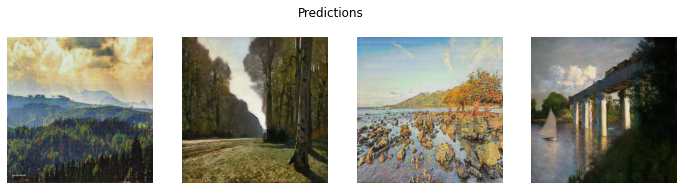

In [13]:
dls.show_batch((b[0], b[1]), max_n=2, show=True)
plt.suptitle('Input')
dls.show_batch((preds[1],preds[0]), max_n=2, show=True)
plt.suptitle('Predictions')

In [14]:
testA_path = '../input/gan-getting-started/photo_jpg/'
pred_path = '../images/'

In [15]:
get_preds_cyclegan(learn,testA_path,pred_path,suffix='jpg')

In [ ]:
#making folder of output images
import shutil
shutil.make_archive("/kaggle/working/images", 'zip', "/kaggle/images")